In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
from keras import backend as K
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing import image

Using TensorFlow backend.


In [3]:
model = ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)


In [62]:
basic = pd.read_csv('/Users/yy/Documents/Study/USYD/COMP5707/result/Resnet50_basic.csv',encoding="ISO-8859-1")
re_basic = pd.read_csv('/Users/yy/Documents/Study/USYD/COMP5707/result/raspberrypi_basic.csv',encoding="ISO-8859-1")
re_multi_frontend = pd.read_csv('/Users/yy/Documents/Study/USYD/COMP5707/result/re_multi_latency_result_frontend.csv',encoding="ISO-8859-1")
multi_frontend = pd.read_csv('/Users/yy/Documents/Study/USYD/COMP5707/result/Resnet50_multi_latency_result_frontend.csv',encoding="ISO-8859-1")



In [63]:
sugery = pd.DataFrame()
sugery['surgery_time'] = re_multi_frontend['1'] + multi_backend['1']
sugery['f-upload_transfer_time'] = basic['transfer_file_size']/1000/(125*45)
sugery['f-download_transfer_time'] = basic['transfer_file_size']/1000/(125*100)
sugery['frontend_transfer_time']  = sugery['f-upload_transfer_time'] + sugery['f-download_transfer_time']


sugery['b-upload_transfer_time'] = 25/1000/(125*45)
sugery['b-download_transfer_time'] = 25/1000/(125*100)

sugery['backend_transfer_time']  = sugery['b-upload_transfer_time'] + sugery['b-download_transfer_time']

sugery['transfer_time']  = sugery['frontend_transfer_time'] + sugery['backend_transfer_time']
sugery['surgery_time_with_transfer'] = sugery['surgery_time'] + sugery['transfer_time']

sugery['frontend_inference_time'] = np.random.normal(loc=7, scale=0.15, size=len(basic))
sugery['backend_inference_time'] = np.random.normal(loc=basic['inference_time'][0], scale=0.15, size=len(basic))
sugery['accelerate'] = (sugery['frontend_inference_time'] - sugery['surgery_time_with_transfer'])/sugery['frontend_inference_time']

#keras_result.sort_values('surgery_transfer_time')

sugery['max-trafer-time'] = basic['inference_time'][0] - sugery['surgery_time']
sugery['min-trafer-mbps']  = (basic['transfer_file_size'] + 25)*2/1000/(sugery['frontend_inference_time'] - sugery['surgery_time_with_transfer'])/125






In [64]:
wound = []
for i in basic['wound']:
    wound.append(i[1:-1])     
sugery['wound'] = wound


['1', '2', '3', '4', '5', '6', '7, 14', '7, 16', '8, 14', '8, 16', '9, 14', '9, 16', '10, 14', '10, 16', '11, 14', '11, 16', '12, 14', '12, 16', '13, 14', '13, 16', '15, 14', '15, 16', '17', '18', '27', '28', '37', '38', '39, 46', '39, 48', '40, 46', '40, 48', '41, 46', '41, 48', '42, 46', '42, 48', '43, 46', '43, 48', '44, 46', '44, 48', '45, 46', '45, 48', '47, 46', '47, 48', '49', '50', '59', '60', '69', '70', '79', '80', '81, 88', '81, 90', '82, 88', '82, 90', '83, 88', '83, 90', '84, 88', '84, 90', '85, 88', '85, 90', '86, 88', '86, 90', '87, 88', '87, 90', '89, 88', '89, 90', '91', '92', '101', '102', '111', '112', '121', '122', '131', '132', '141', '142', '143, 150', '143, 152', '144, 150', '144, 152', '145, 150', '145, 152', '146, 150', '146, 152', '147, 150', '147, 152', '148, 150', '148, 152', '149, 150', '149, 152', '151, 150', '151, 152', '153', '154', '163', '164', '173', '174', '175']


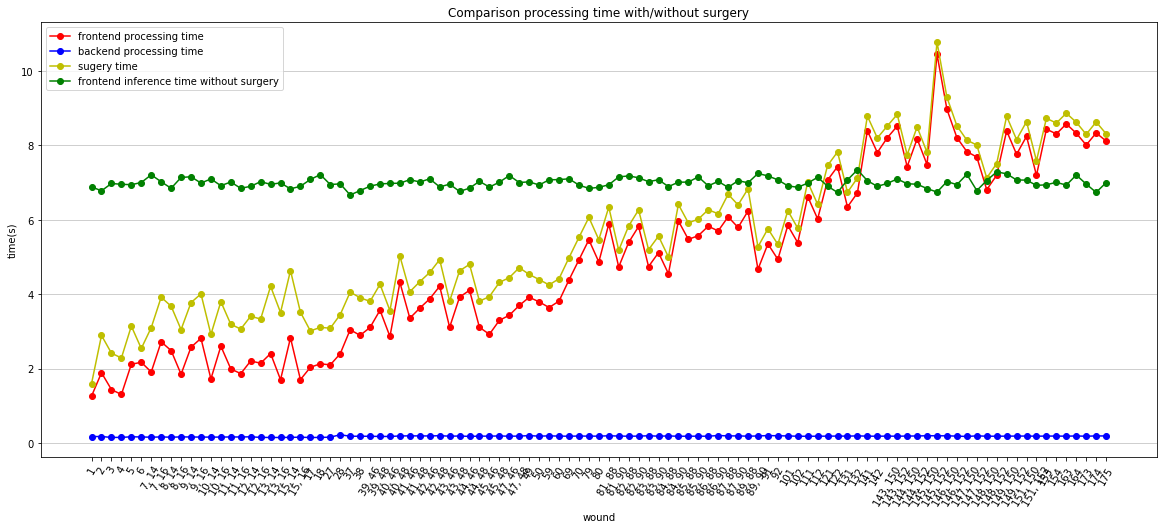

In [65]:
plt.figure(figsize=(20,8))
plt.plot(sugery['wound'],re_multi_frontend['1'],'ro-')
plt.plot(sugery['wound'],multi_backend['1'],'bo-')
plt.plot(sugery['wound'],sugery['surgery_time_with_transfer'],'yo-')
plt.plot(sugery['wound'],sugery['frontend_inference_time'],'go-')
plt.xticks(sugery['wound'],sugery['wound'],rotation=60)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('wound')
plt.ylabel('time(s)')
plt.title('Comparison processing time with/without surgery')
plt.legend(['frontend processing time','backend processing time','sugery time','frontend inference time without surgery'],
          loc = 'best')

Text(0.5,1,'Acceleration with surgery')

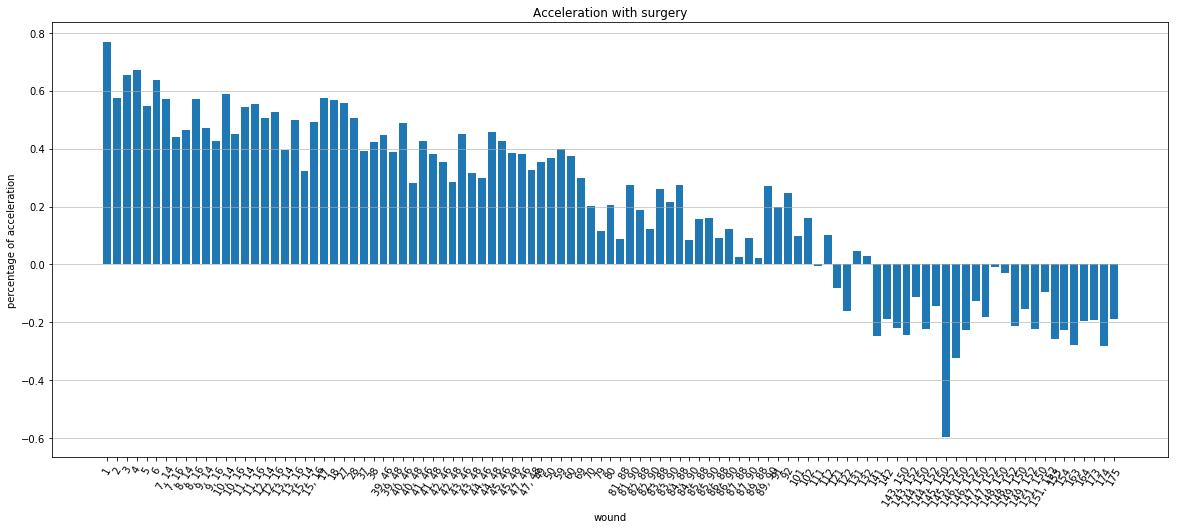

In [66]:
plt.figure(figsize=(20,8))
plt.bar(sugery['wound'],sugery['accelerate'])
plt.grid(axis='y', alpha=0.75)
plt.xticks(sugery['wound'],sugery['wound'],rotation=60)
plt.xlabel('wound')
plt.ylabel('percentage of acceleration')
plt.title('Acceleration with surgery')

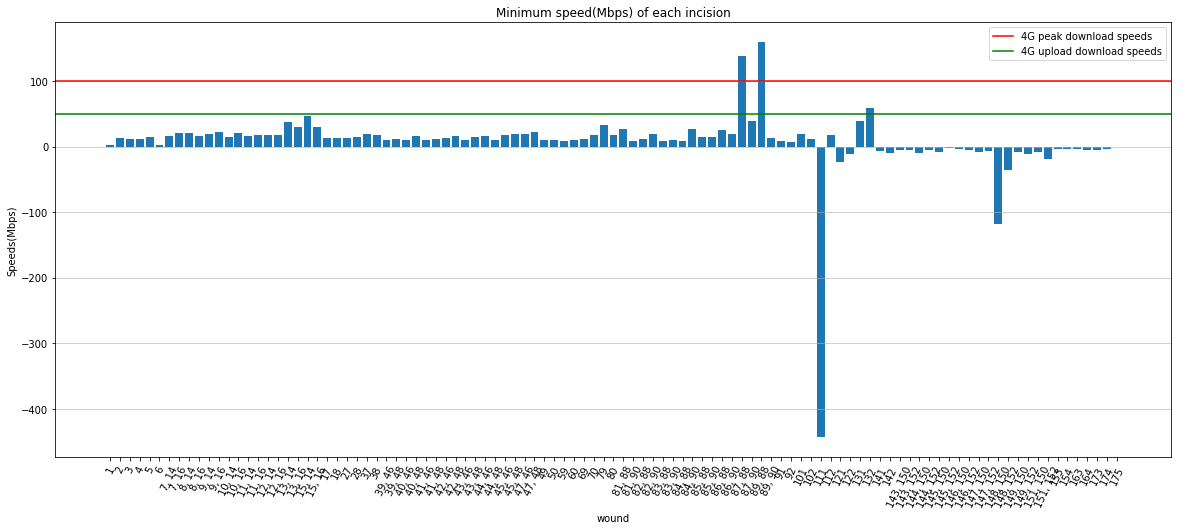

In [69]:
plt.figure(figsize=(20,8))
plt.bar(sugery['wound'],sugery['min-trafer-mbps'])
plt.grid(axis='y', alpha=0.75)
plt.xticks(sugery['wound'],sugery['wound'],rotation=65)
plt.xlabel('wound')
plt.ylabel('Speeds(Mbps)')
plt.title('Minimum speed(Mbps) of each incision')
plt.axhline(y=100, color='r', linestyle='-')
plt.axhline(y=50, color='g', linestyle='-')
plt.legend(['4G peak download speeds','4G upload download speeds'],loc = 'best')

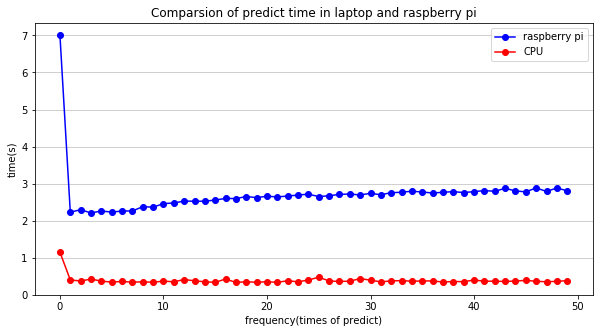

In [250]:
inference_raspberry = []
file_in = open('/Users/yy/Desktop/result/inference_time_ra.txt','r')
for line in file_in.readlines():
    inference_raspberry.append(float(line))

inference_cpu = []
file_in = open('/Users/yy/Desktop/result/inference_time.txt','r')
for line in file_in.readlines():
    inference_cpu.append(float(line))

plt.figure(figsize=(10,5))
plt.plot(np.arange(len(inference_raspberry)),inference_raspberry,'bo-')
plt.plot(np.arange(len(inference_cpu)),inference_cpu,'ro-')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('frequency(times of predict)')
plt.ylabel('time(s)')
plt.title('Comparsion of predict time in laptop and raspberry pi')
plt.legend(['raspberry pi','CPU'],loc = 'best')

In [70]:
sugery = pd.DataFrame()
sugery['wound'] = wound
sugery['frontend_time'] = re_multi_frontend.iloc[:,1:100].mean(axis=1)
sugery['backend_time'] = multi_backend.iloc[:,1:100].mean(axis=1)
sugery['surgery_time'] =  sugery['frontend_time'] + sugery['backend_time'] 
sugery['f-upload_transfer_time'] = basic['transfer_file_size']/1000/(125*45)
sugery['f-download_transfer_time'] = basic['transfer_file_size']/1000/(125*100)
sugery['frontend_transfer_time']  = sugery['f-upload_transfer_time'] + sugery['f-download_transfer_time']


sugery['b-upload_transfer_time'] = 25/1000/(125*45)
sugery['b-download_transfer_time'] = 25/1000/(125*100)

sugery['backend_transfer_time']  = sugery['b-upload_transfer_time'] + sugery['b-download_transfer_time']

sugery['transfer_time']  = sugery['frontend_transfer_time'] + sugery['backend_transfer_time']
sugery['surgery_time_with_transfer'] = sugery['surgery_time'] + sugery['transfer_time']

sugery['frontend_inference_time'] = np.random.normal(loc=2, scale=max(basic['inference_time'][1:-1])-min(basic['inference_time'][1:-1]), size=len(basic))
sugery['backend_inference_time'] = np.random.normal(loc=np.mean(basic['inference_time'][1:-1]), scale=max(basic['inference_time'][1:-1])-min(basic['inference_time'][1:-1]), size=len(basic))
sugery['accelerate'] = (sugery['frontend_inference_time'] - sugery['surgery_time_with_transfer'])/sugery['frontend_inference_time']

#keras_result.sort_values('surgery_transfer_time')

sugery['max-trafer-time'] = sugery['frontend_inference_time'] - sugery['surgery_time']
sugery['min-trafer-mbps']  = (basic['transfer_file_size'] + 25)*2/1000/sugery['max-trafer-time']/125







In [272]:
# for i in range(len(sugery['frontend_time'])):
#     if sugery['frontend_time'][i]>1:
#         print(i,sugery['frontend_time'][i])


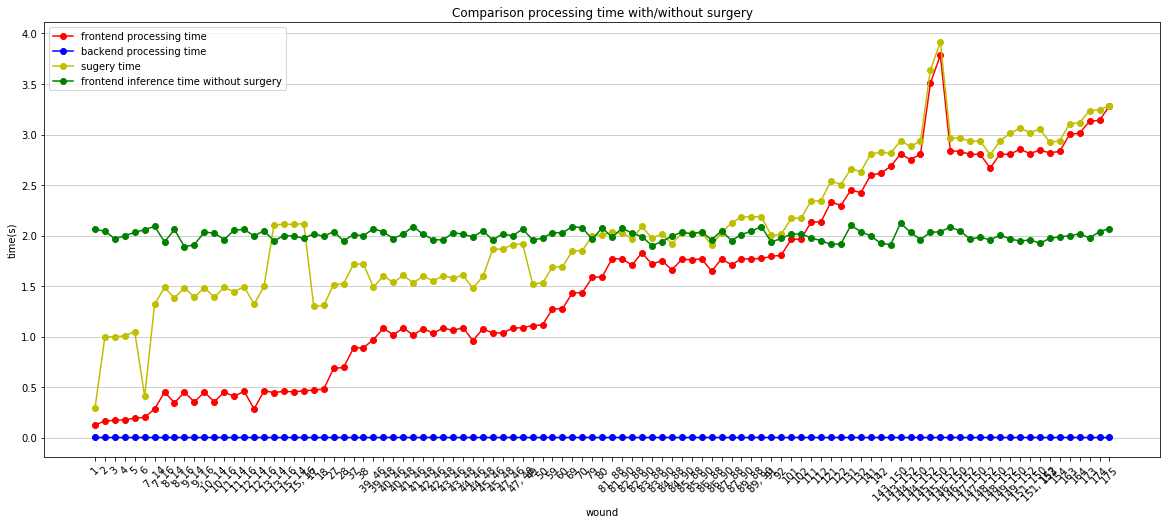

In [57]:
plt.figure(figsize=(20,8))
plt.plot(sugery['wound'],re_multi_frontend.iloc[:,1:100].mean(axis=1),'ro-')
plt.plot(sugery['wound'],multi_backend.iloc[:,1:100].mean(axis=1),'bo-')
plt.plot(sugery['wound'],sugery['surgery_time_with_transfer'],'yo-')
plt.plot(sugery['wound'],sugery['frontend_inference_time'],'go-')
plt.xticks(sugery['wound'],sugery['wound'],rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('wound')
plt.ylabel('time(s)')
plt.title('Comparison processing time with/without surgery')
plt.legend(['frontend processing time','backend processing time','sugery time','frontend inference time without surgery'],
          loc = 'best')


Text(0.5,1,'Acceleration with surgery')

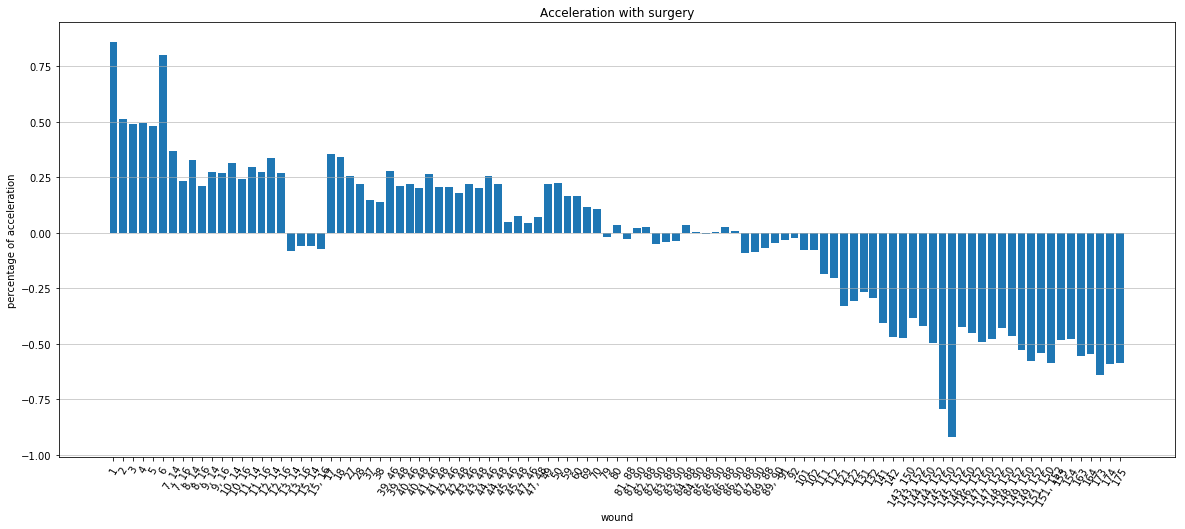

In [58]:
plt.figure(figsize=(20,8))
plt.bar(sugery['wound'],sugery['accelerate'])
plt.grid(axis='y', alpha=0.75)
plt.xticks(sugery['wound'],sugery['wound'],rotation=60)
plt.xlabel('wound')
plt.ylabel('percentage of acceleration')
plt.title('Acceleration with surgery')

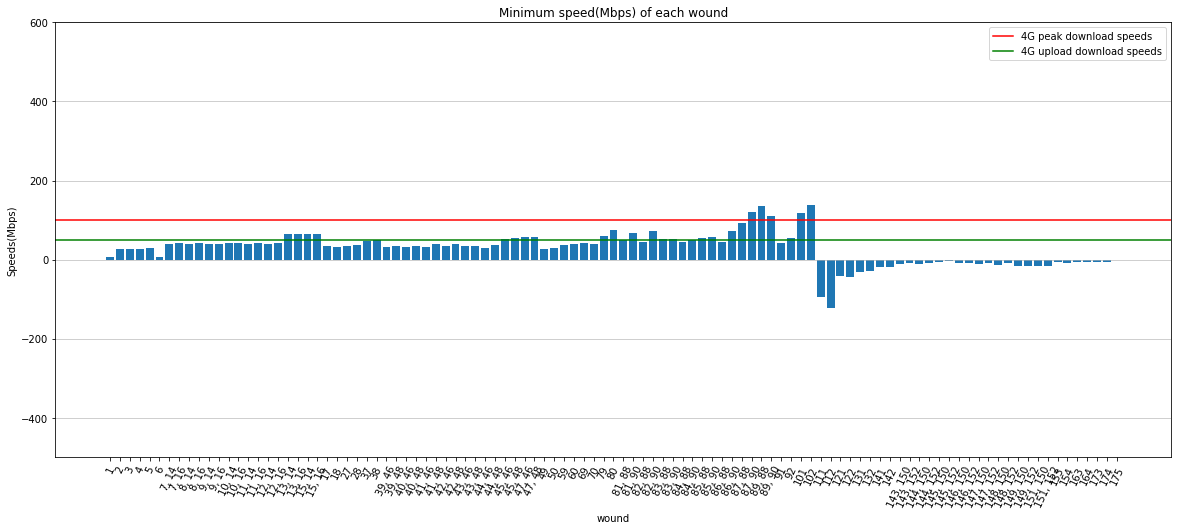

In [71]:
plt.figure(figsize=(20,8))
plt.bar(sugery['wound'],sugery['min-trafer-mbps'])
plt.grid(axis='y', alpha=0.75)
plt.xticks(sugery['wound'],sugery['wound'],rotation=65)
plt.xlabel('wound')
plt.ylabel('Speeds(Mbps)')
plt.title('Minimum speed(Mbps) of each wound')
plt.ylim(-500,600)
plt.axhline(y=100, color='r', linestyle='-')
plt.axhline(y=50, color='g', linestyle='-')
plt.legend(['4G peak download speeds','4G upload download speeds'],loc = 'best')